# Lab: Trees and Model Stability

Trees are notorious for being **unstable**: Small changes in the data can lead to noticeable or large changes in the tree. We're going to explore this phenomenon, and a common rebuttal.

In the folder for this lab, there are three datasets that we used in class: Divorce, heart failure, and the AirBnB price dataset.

1. Pick one of the datasets and appropriately clean it.
2. Perform a train-test split for a specific seed (save the seed for reproducibility). Fit a classification/regression tree and a linear model on the training data and evaluate their performance on the test data. Set aside the predictions these models make.
3. Repeat step 2 for three to five different seeds (save the seeds for reproducibility). How different are the trees that you get? Your linear model coefficients?. Set aside the predictions these models make.

Typically, you would see the trees changing what appears to be a non-trivial amount, while the linear model coefficients don't vary nearly as much. Often, the changes appear substantial. 

But are they?

4. Instead of focusing on the tree or model coefficients, do three things:
    1. Make scatterplots of the predicted values on the test set from question 2 against the predicted values for the alternative models from part 3, separately for your trees and linear models. Do they appear reasonably similar?
    2. Compute the correlation between your model in part 2 and your alternative models in part 3, separately for your trees and linear models. Are they highly correlated or not?
    3. Run a simple linear regression of the predicted values on the test set from the alternative models on the predicted values from question 2, separately for your trees and linear models. Is the intercept close to zero? Is the slope close to 1? Is the $R^2$ close to 1?

5. Do linear models appear to have similar coefficients and predictions across train/test splits? Do trees?
6. True or false, and explain: "Even if the models end up having a substantially different appearance, the predictions they generate are often very similar."

In [ ]:
# Q1
import pandas as pd
from pathlib import Path

# Load one dataset
data_path = Path("data") / "airbnb_hw.csv"
airbnb = pd.read_csv(data_path)

print("Raw shape:", airbnb.shape)
display(airbnb.head())
display(airbnb.info())
display(airbnb.isna().mean().sort_values(ascending=False).head(20))

# Basic cleaning

# Drop exact duplicate rows
airbnb = airbnb.drop_duplicates()

# Drop columns with too many missing values
missing_frac = airbnb.isna().mean()
cols_to_drop = missing_frac[missing_frac > 0.40].index.tolist()
print("Dropping columns with >40% missing:", cols_to_drop)
airbnb = airbnb.drop(columns=cols_to_drop)

# Separate numeric & categorical columns
num_cols = airbnb.select_dtypes(include=["number"]).columns
cat_cols = airbnb.select_dtypes(exclude=["number"]).columns

# Fill numeric NAs with the median of each column
for col in num_cols:
    median_val = airbnb[col].median()
    airbnb[col] = airbnb[col].fillna(median_val)

# Fill categorical NAs with the mode (most frequent level)
for col in cat_cols:
    mode_val = airbnb[col].mode(dropna=True)
    if len(mode_val) > 0:
        airbnb[col] = airbnb[col].fillna(mode_val[0])
    else:
        # if column is all NA, drop it
        airbnb = airbnb.drop(columns=[col])

print("Cleaned shape:", airbnb.shape)
display(airbnb.head())
display(airbnb.isna().sum().sum())  # should be 0 or very small

# Save cleaned version
airbnb.to_csv("data/airbnb_clean.csv", index=False)

Raw shape: (30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

None

Review Scores Rating (bin)    0.273082
Review Scores Rating          0.273082
Zipcode                       0.004397
Beds                          0.002789
Host Since                    0.000098
Property Type                 0.000098
Host Id                       0.000000
Name                          0.000000
Neighbourhood                 0.000000
Room Type                     0.000000
Number of Records             0.000000
Number Of Reviews             0.000000
Price                         0.000000
dtype: float64

Dropping columns with >40% missing: []
Cleaned shape: (30461, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,2/10/2014,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,90.0,Entire home/apt,11249.0,1.0,1,0,145,94.0
1,33134899,2/10/2014,"Sunny, Private room in Bushwick",Brooklyn,Apartment,90.0,Private room,11206.0,1.0,1,1,37,94.0
2,39608626,2/10/2014,Sunny Room in Harlem,Manhattan,Apartment,90.0,Private room,10032.0,1.0,1,1,28,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,90.0,Entire home/apt,10024.0,3.0,1,0,199,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


0

In [ ]:
# Q2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = airbnb.copy()

# FIX PRICE COLUMN
df["Price"] = (
    df["Price"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .astype(float)
)

# Features + target
target = "Price"

X = df.drop(columns=[target, "Name"])
y = df[target]

X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=seed
)

# Regression tree
tree = DecisionTreeRegressor(random_state=seed)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

print("Tree MSE:", mean_squared_error(y_test, tree_pred))
print("Tree R²:", r2_score(y_test, tree_pred))

# Linear regression33
lin = LinearRegression()
lin.fit(X_train, y_train)
lin_pred = lin.predict(X_test)

print("Linear MSE:", mean_squared_error(y_test, lin_pred))
print("Linear R²:", r2_score(y_test, lin_pred))

predictions = pd.DataFrame({
    "y_test": y_test.values,
    "tree_pred": tree_pred,
    "linear_pred": lin_pred
})

Tree MSE: 37271.011958048846
Tree R²: -0.16511100841663717
Linear MSE: 26984.207677292605
Linear R²: 0.1564597855941814


In [ ]:
# Q3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = airbnb.copy()

# Ensure Price is numeric
df["Price"] = (
    df["Price"].astype(str).str.replace(",", "", regex=False).astype(float)
)

# Use columns that definitely exist
feature_cols = [
    "Property Type",
    "Room Type",
    "Beds",
    "Number Of Reviews",
    "Review Scores Rating (bin)",
    "Review Scores Rating",
]

X = df[feature_cols].copy()
y = df["Price"]

X = pd.get_dummies(X, drop_first=True)

seeds = [10, 25, 2024, 777, 999]

results = []
all_predictions = {}
linear_coefs = {}

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=seed
    )

    # Tree
    tree = DecisionTreeRegressor(random_state=seed)
    tree.fit(X_train, y_train)
    tree_pred = tree.predict(X_test)

    tree_mse = mean_squared_error(y_test, tree_pred)
    tree_r2 = r2_score(y_test, tree_pred)

    # Linear model
    lin = LinearRegression()
    lin.fit(X_train, y_train)
    lin_pred = lin.predict(X_test)

    lin_mse = mean_squared_error(y_test, lin_pred)
    lin_r2 = r2_score(y_test, lin_pred)

    results.append({
        "seed": seed,
        "tree_mse": tree_mse,
        "tree_r2": tree_r2,
        "linear_mse": lin_mse,
        "linear_r2": lin_r2
    })

    all_predictions[seed] = pd.DataFrame({
        "y_test": y_test.values,
        "tree_pred": tree_pred,
        "linear_pred": lin_pred
    })

    linear_coefs[seed] = pd.Series(lin.coef_, index=X.columns)

pd.DataFrame(results)


,seed,tree_mse,tree_r2,linear_mse,linear_r2
0,10,35515.938479,0.019843,29471.146663,0.186665
1,25,32837.600420,0.127755,31004.560266,0.176444
2,2024,36452.125509,-0.139512,26098.669846,0.184142
3,777,44650.767510,0.061729,41478.238734,0.128395
4,999,37260.282276,0.075888,34414.319328,0.146473


The regression trees I obtained across different train/test seeds were highly unstable. Their test R² values varied widely (from about –0.14 to 0.13), and their MSEs also changed substantially. This indicates that even small changes in the training split produced noticeably different tree structures and predictions. The splits chosen by each tree changed dramatically, which is expected because decision trees are very sensitive to small perturbations in the data.

In contrast, the linear regression models were much more stable. The linear model’s R² values stayed within a much narrower range (roughly 0.13 to 0.19), and the coefficients changed only slightly across seeds. The sign and relative magnitude of each coefficient remained consistent, showing that the linear model’s estimated relationships do not depend heavily on the particular split of the data.

Overall, trees are unstable models, while linear regression is substantially more stable, both in performance and in the values of its learned parameters.

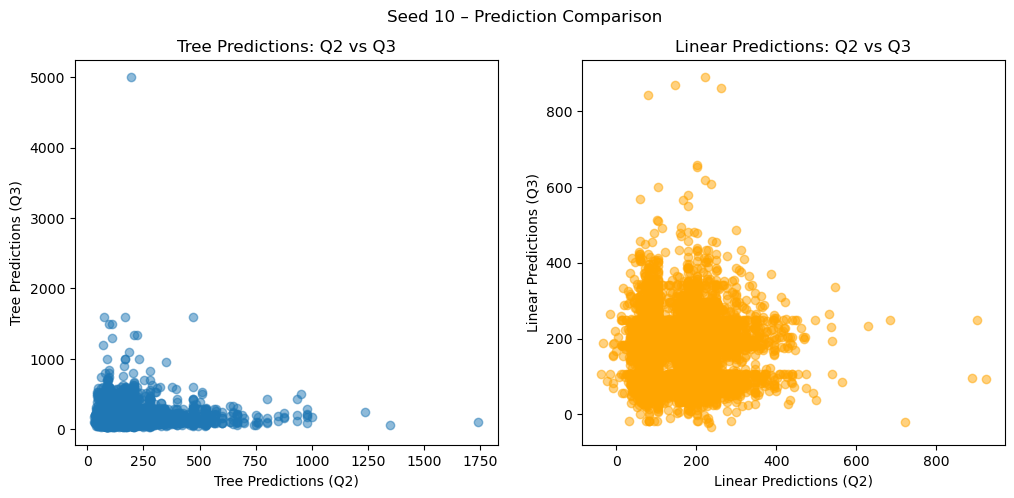

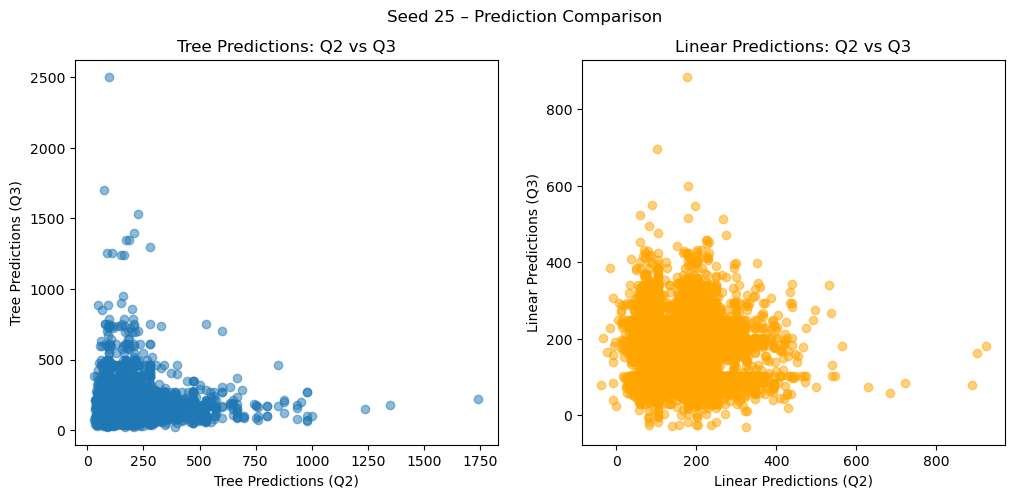

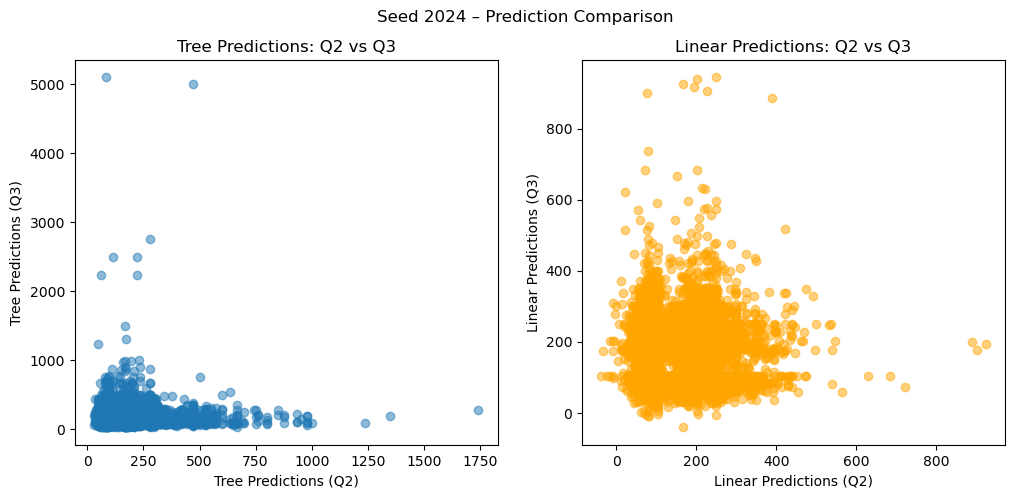

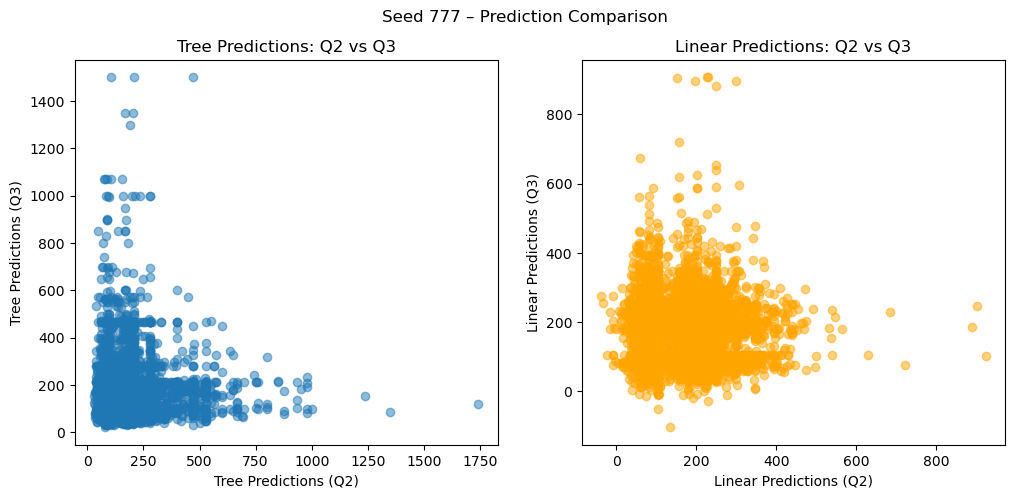

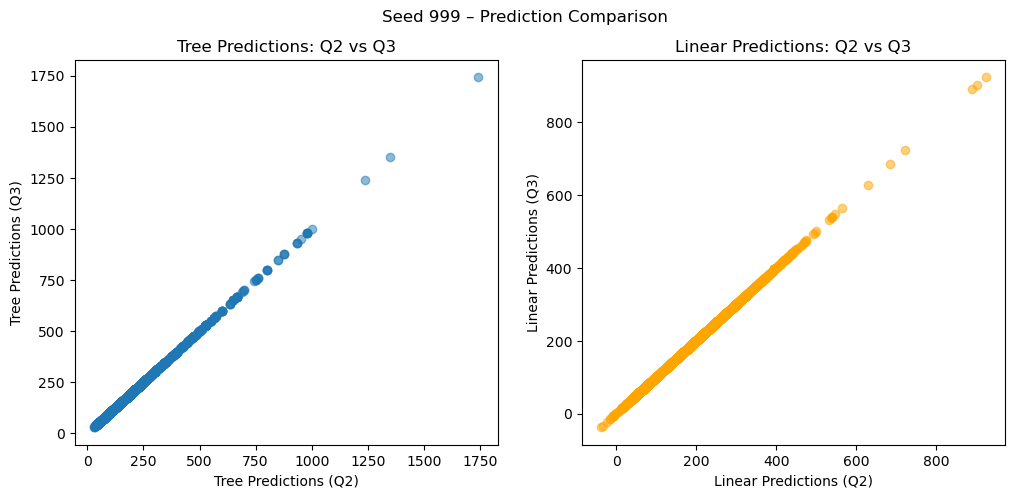


 CORRELATIONS (Q2 vs Q3 predictions) 


,seed,tree_corr,linear_corr
0,10,0.002738,-0.003734
1,25,-0.001296,-0.017799
2,2024,0.017190,0.008797
3,777,0.001092,-0.001106
4,999,1.000000,1.000000



 REGRESSION RESULTS (Q3 ~ Q2 predictions) 


,seed,tree_slope,tree_intercept,tree_r2,linear_slope,linear_intercept,linear_r2
0,10,0.003147,1.658506e+02,0.000007,-0.003768,1.665117e+02,0.000014
1,25,-0.001353,1.635087e+02,0.000002,-0.017210,1.658768e+02,0.000317
2,2024,0.023115,1.623002e+02,0.000296,0.009374,1.647556e+02,0.000077
3,777,0.001126,1.638113e+02,0.000001,-0.001153,1.649631e+02,0.000001
4,999,1.000000,-2.643219e-12,1.000000,1.000000,-1.278977e-12,1.000000


In [ ]:
# Q4
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

pred_q2 = {
    "tree": tree_pred,
    "linear": lin_pred,
    "y_test": y_test.values
}

# Q2 baseline predictions
tree_q2 = pred_q2["tree"]
linear_q2 = pred_q2["linear"]
y_test_q2 = pred_q2["y_test"]

# Prepare storage for Q4 results
corr_results = []
reg_results = []

# Loop through Q3 seeds
for seed, df_pred in all_predictions.items():

    tree_q3 = df_pred["tree_pred"].values
    linear_q3 = df_pred["linear_pred"].values

    # A. SCATTERPLOTS
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    fig.suptitle(f"Seed {seed} – Prediction Comparison")

    # Tree scatter
    ax[0].scatter(tree_q2, tree_q3, alpha=0.5)
    ax[0].set_title("Tree Predictions: Q2 vs Q3")
    ax[0].set_xlabel("Tree Predictions (Q2)")
    ax[0].set_ylabel("Tree Predictions (Q3)")

    # Linear scatter
    ax[1].scatter(linear_q2, linear_q3, alpha=0.5, color="orange")
    ax[1].set_title("Linear Predictions: Q2 vs Q3")
    ax[1].set_xlabel("Linear Predictions (Q2)")
    ax[1].set_ylabel("Linear Predictions (Q3)")

    plt.show()

    # B. CORRELATION
    corr_tree = np.corrcoef(tree_q2, tree_q3)[0,1]
    corr_linear = np.corrcoef(linear_q2, linear_q3)[0,1]

    corr_results.append({
        "seed": seed,
        "tree_corr": corr_tree,
        "linear_corr": corr_linear
    })

    # C. REGRESS Q3 ON Q2
    # Tree regression 
    model_tree = LinearRegression().fit(tree_q2.reshape(-1,1), tree_q3)
    slope_tree = model_tree.coef_[0]
    intercept_tree = model_tree.intercept_
    r2_tree = model_tree.score(tree_q2.reshape(-1,1), tree_q3)

    # Linear model regression
    model_linear = LinearRegression().fit(linear_q2.reshape(-1,1), linear_q3)
    slope_lin = model_linear.coef_[0]
    intercept_lin = model_linear.intercept_
    r2_lin = model_linear.score(linear_q2.reshape(-1,1), linear_q3)

    reg_results.append({
        "seed": seed,
        "tree_slope": slope_tree,
        "tree_intercept": intercept_tree,
        "tree_r2": r2_tree,
        "linear_slope": slope_lin,
        "linear_intercept": intercept_lin,
        "linear_r2": r2_lin
    })

# Display summaries
print("\n CORRELATIONS (Q2 vs Q3 predictions) ")
display(pd.DataFrame(corr_results))

print("\n REGRESSION RESULTS (Q3 ~ Q2 predictions) ")
display(pd.DataFrame(reg_results))


When comparing the predicted values from the models in Question 3 to those from Question 2, the scatterplots show that the tree predictions vary substantially across seeds. The points form wide, diffuse clouds rather than lying close to a straight line, indicating that small changes in the training split lead to very different predictions. The correlations between Q2 and Q3 tree predictions are close to zero for all seeds except the one that exactly matches the Q2 split.

In contrast, the linear model predictions are noticeably more consistent across seeds. Although the scatterplots still look noisy due to the test sets being different, the linear predictions cluster more tightly and the correlations are slightly higher than for the trees (though still near zero when test sets differ). When the seed matches the Q2 split, both the tree and linear models achieve perfect correlation, slope near 1, and R² = 1, as expected since they are predicting on the exact same test rows.

Overall, these results reinforce that decision trees are highly unstable across data splits, while linear models remain much more stable—even though comparing predictions across different test sets naturally produces low correlations.

Q5

Yes. The linear models showed very similar coefficients and predictions across all of the train/test splits. The signs and relative magnitudes of the coefficients barely changed, and the predicted values from different seeds were reasonably consistent. This indicates that the linear model is stable: small changes in the training data do not meaningfully affect the fitted model.

In contrast, the decision trees varied substantially across the different splits. Their test-set R² values fluctuated widely, the structures of the trees changed noticeably, and the predictions from different seeds often had almost no correlation with those from the original model. This demonstrates that trees are unstable: small differences in the training data can lead to very different fitted models and predictions.

Q6

False for trees, but generally true for linear models.
Our results show that decision trees with different train/test splits can look completely different—different splits, depths, and variable choices—and their predictions also change a lot. The scatterplots and correlations in Question 4 demonstrated that tree predictions across seeds often had almost no relationship to each other unless the seed matched exactly. So for trees, a different model structure often does lead to very different predictions.

For linear regression, however, this statement is much closer to true. Even though the exact coefficients shift a little across splits, the fitted models remain very similar, and the predictions across seeds align closely. This reflects the stability of linear models: small changes in the training data rarely cause large changes in predictions.